In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

crime_data = pd.read_csv('Data/Ireland_Crime_Data.csv')

crime_data.head(10)


,STATISTIC Label,Year,Type of Offence,UNIT,VALUE
0,Recorded crime incidents,2003,Homicide offences,Number,100.0
1,Recorded crime incidents,2003,Murder,Number,35.0
2,Recorded crime incidents,2003,Manslaughter,Number,16.0
3,Recorded crime incidents,2003,Infanticide,Number,0.0
4,Recorded crime incidents,2003,Dangerous driving leading to death,Number,49.0
5,Recorded crime incidents,2003,Sexual offences,Number,1572.0
6,Recorded crime incidents,2003,Rape of a male or female,Number,325.0
7,Recorded crime incidents,2003,Defilement of a boy or girl less than 17 years...,Number,112.0
8,Recorded crime incidents,2003,Sexual offence involving mentally impaired person,Number,23.0
9,Recorded crime incidents,2003,Aggravated sexual assault,Number,11.0


In [6]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1575 entries, 0 to 1574
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATISTIC Label  1575 non-null   object 
 1   Year             1575 non-null   int64  
 2   Type of Offence  1575 non-null   object 
 3   UNIT             1575 non-null   object 
 4   VALUE            1574 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 61.7+ KB


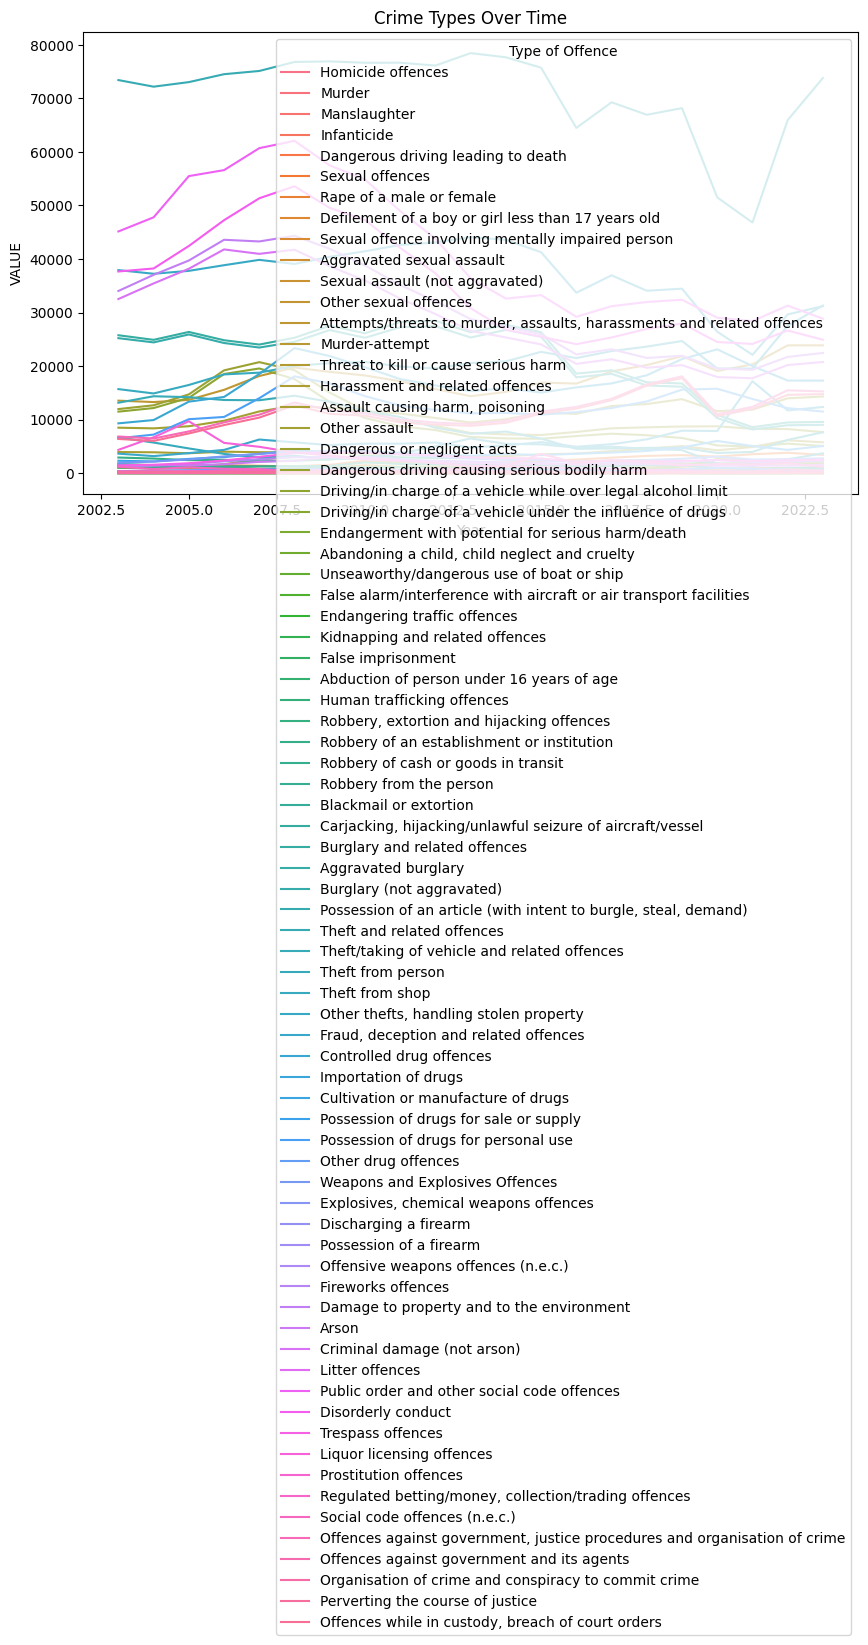

In [9]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=crime_data, x='Year', y='VALUE', hue='Type of Offence')
plt.title('Crime Types Over Time')
plt.show()


In [10]:
# Print unique values in 'Type of Offence' column
print("Unique values in 'Type of Offence':")
print(crime_data['Type of Offence'].unique())

# Print unique values in 'Year' column
print("\nUnique values in 'Year':")
print(crime_data['Year'].unique())


Unique values in 'Type of Offence':
['Homicide offences' 'Murder' 'Manslaughter' 'Infanticide'
 'Dangerous driving leading to death' 'Sexual offences'
 'Rape of a male or female'
 'Defilement of a boy or girl less than 17 years old'
 'Sexual offence involving mentally impaired person'
 'Aggravated sexual assault' 'Sexual assault (not aggravated)'
 'Other sexual offences'
 'Attempts/threats to murder, assaults, harassments and related offences'
 'Murder-attempt' 'Threat to kill or cause serious harm'
 'Harassment and related offences' 'Assault causing harm, poisoning'
 'Other assault' 'Dangerous or negligent acts'
 'Dangerous driving causing serious bodily harm'
 'Driving/in charge of a vehicle while over legal alcohol limit'
 'Driving/in charge of a vehicle under the influence of drugs'
 'Endangerment with potential for serious harm/death'
 'Abandoning a child, child neglect and cruelty'
 'Unseaworthy/dangerous use of boat or ship'
 'False alarm/interference with aircraft or air transp

C:\Users\micha\AppData\Local\Temp\ipykernel_5280\3477097653.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=crime_counts.index, x=crime_counts.values, palette='viridis')


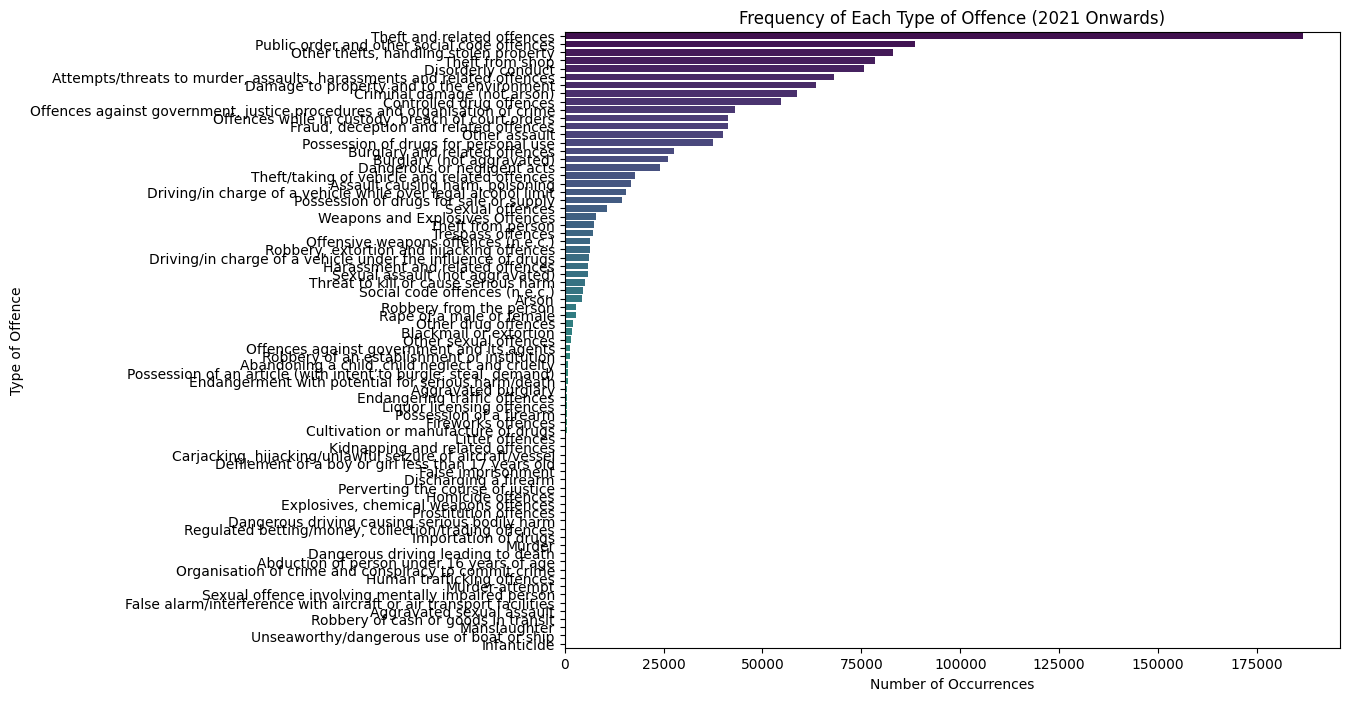

In [12]:
# Filter data for years 2021 onwards
recent_crime_data = crime_data[crime_data['Year'] >= 2021]

# Sum occurrences of each crime type from 2021 onwards
crime_counts = recent_crime_data.groupby('Type of Offence')['VALUE'].sum().sort_values(ascending=False)

# Plot the data
plt.figure(figsize=(10, 8))
sns.barplot(y=crime_counts.index, x=crime_counts.values, palette='viridis')
plt.title('Frequency of Each Type of Offence (2021 Onwards)')
plt.xlabel('Number of Occurrences')
plt.ylabel('Type of Offence')
plt.show()

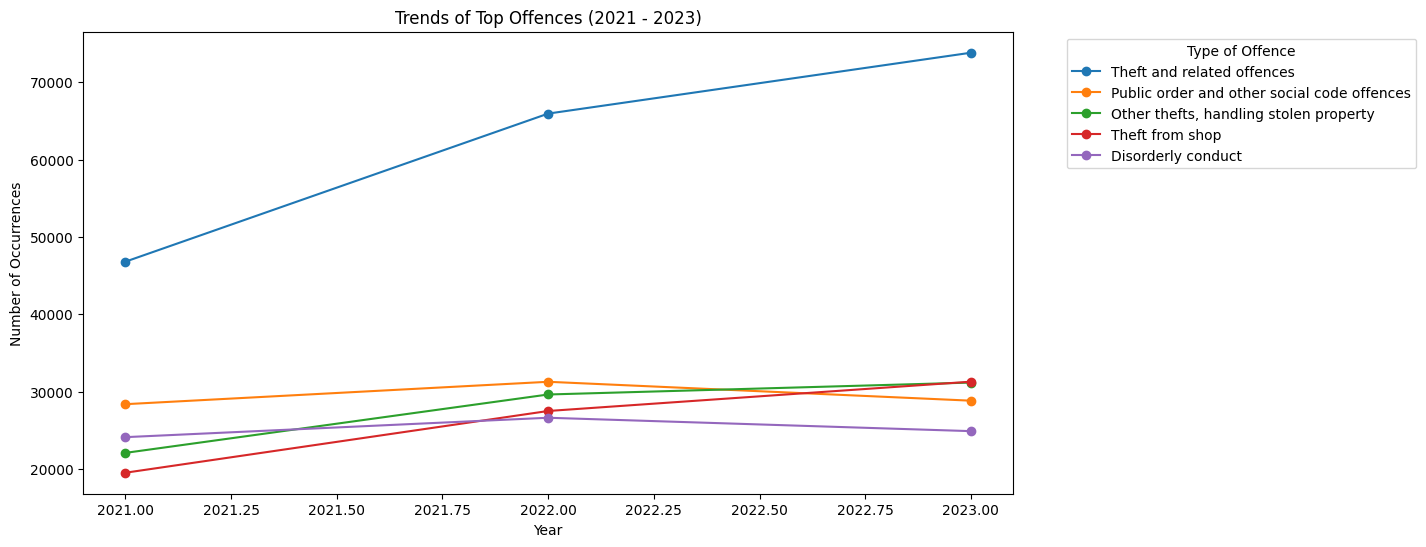

In [13]:
# Group by Year and Type of Offence, summing the 'VALUE' for each combination
crime_trends = recent_crime_data.groupby(['Year', 'Type of Offence'])['VALUE'].sum().unstack(fill_value=0)

# Plotting a subset of offences (top 5 most frequent offences)
top_offences = crime_counts.head(5).index  # Adjust number of offences as needed
crime_trends[top_offences].plot(kind='line', figsize=(12, 6), marker='o')
plt.title('Trends of Top Offences (2021 - 2023)')
plt.xlabel('Year')
plt.ylabel('Number of Occurrences')
plt.legend(title='Type of Offence', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
